### BUSA8000 – Techniques in Business Analytics, Session 2, 2024
#### Assessment 2 Student_Name: Manuel Cabeza Student_ID: 48622605



# Section 1: Exploratory Data Analysis 
    1.1 Read data and get to know it
    1.2 Find NAs and clean them
    1.3 Find wrong entries and clean them
    1.4 Find duplicates and clean them
    1.5 Find outliers and clean if any
    1.6 Find skewness and correct it if any


 ## 1.1 Read data and get to know it

In [1]:
!pip install --upgrade openpyxl

first we import all the libraries needed, read the file and take a look at it

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

kdf = pd.read_excel("koalas_dataset.xlsx")
kdf.head() 

C:\Users\manue\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,koala_id,region,habitat,gender,age_in_years,Paw Size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
0,1,1,VIC,m,8.0,16.0,77.0,19.1,19.5,24.5,15.4,2.2,63.0,61.0
1,2,1,VIC,f,6.0,16.5,79.5,17.5,16.2,22.5,12.6,3.0,63.5,58.0
2,3,1,VIC,f,6.0,19.0,83.5,19.0,16.9,25.4,15.0,2.5,65.0,59.0
3,4,1,VIC,f,6.0,18.0,80.0,18.2,17.2,26.1,12.1,2.2,63.0,59.0
4,5,1,VIC,f,2.0,16.0,73.5,16.5,18.2,21.0,11.3,2.1,63.5,58.0


Then we use info to understand more about the data

In [3]:
kdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   koala_id             104 non-null    int64  
 1   region               104 non-null    int64  
 2   habitat              104 non-null    object 
 3   gender               104 non-null    object 
 4   age_in_years         102 non-null    float64
 5   Paw Size             104 non-null    float64
 6   total_length         104 non-null    float64
 7   head_length          104 non-null    float64
 8   ear_size             104 non-null    float64
 9   foot_length          102 non-null    float64
 10  skull_width          103 non-null    float64
 11  eye_diameter         104 non-null    float64
 12  chest_circumference  104 non-null    float64
 13  belly_circumference  103 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


  ## 1.2 Find NAs and clean them

Now let´s clean the data. The first thing we are going to do is find how many null values we have

In [4]:
missing_data = kdf.isnull().sum()
missing_data

koala_id               0
region                 0
habitat                0
gender                 0
age_in_years           2
Paw Size               0
total_length           0
head_length            0
ear_size               0
foot_length            2
skull_width            1
eye_diameter           0
chest_circumference    0
belly_circumference    1
dtype: int64

We can notice that the following columns have missing values:

    age_in_years = 2
    foot_length = 2
    skull_width = 1
    belly_circumference = 1

We are going to replace those missing values with the mean of the respective feature or column. 

In [5]:
import pandas as pd

# Assuming kdf is your DataFrame
# Calculate frequency distributions for the specified features
age_freq = kdf['age_in_years'].value_counts().sort_index()
foot_length_freq = kdf['foot_length'].value_counts().sort_index()
skull_width_freq = kdf['skull_width'].value_counts().sort_index()
belly_circumference_freq = kdf['belly_circumference'].value_counts().sort_index()



In [6]:
import pandas as pd
from IPython.display import display, Markdown


# Select only the relevant columns from kdf
features = kdf[['age_in_years', 'foot_length', 'skull_width', 'belly_circumference']]

# Create a summary statistics table using describe
summary_table = features.describe()

# Display the summary table
display(Markdown("#### Table 1: Description of Features with Null Values"))
summary_table



#### Table 1: Description of Features with Null Values

,age_in_years,foot_length,skull_width,belly_circumference
count,102.000000,102.000000,103.000000,103.000000
mean,3.833333,18.461765,12.917476,57.582524
std,1.909244,4.416935,11.160491,2.775150
min,1.000000,10.300000,5.000000,50.000000
25%,2.250000,14.550000,9.950000,56.000000
50%,3.000000,17.950000,11.300000,57.500000
75%,5.000000,22.500000,13.100000,59.250000
max,9.000000,27.900000,120.600000,65.000000


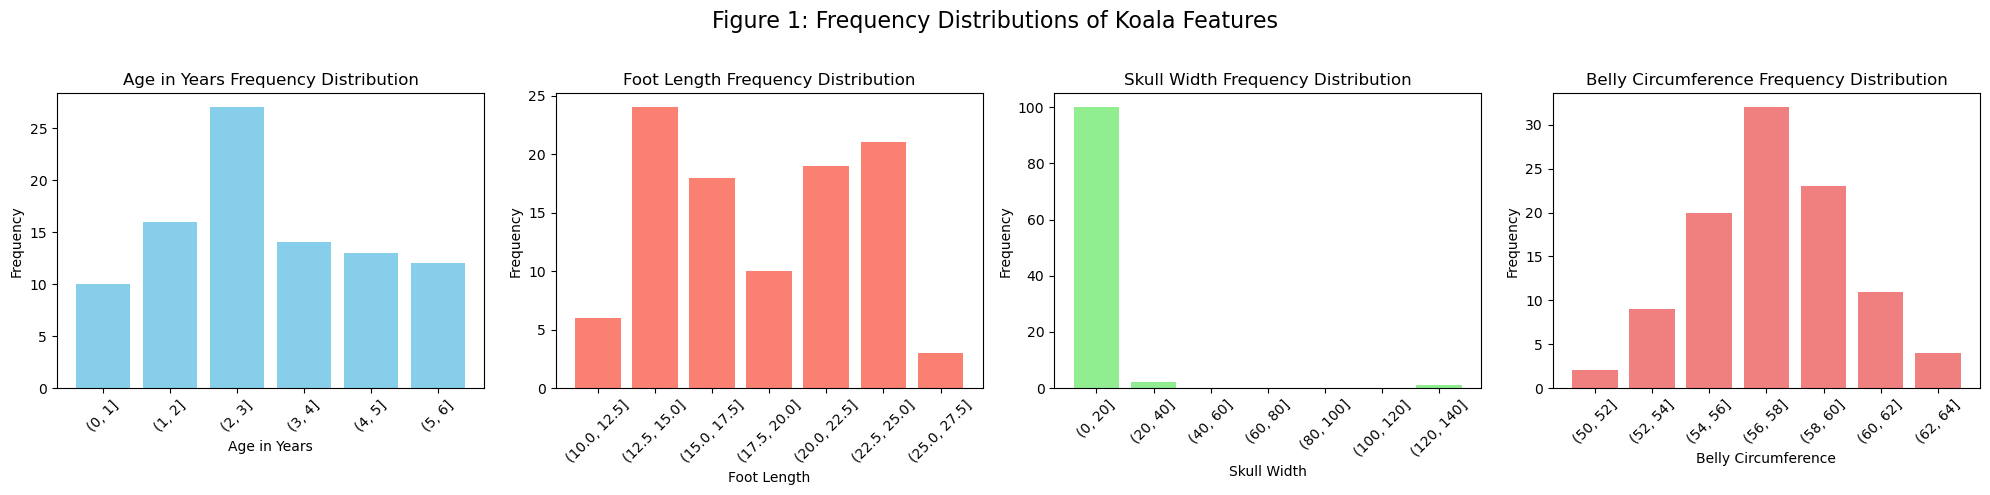

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.suptitle("Figure 1: Frequency Distributions of Koala Features", fontsize=16)

age_bins = [0, 1, 2, 3, 4, 5,6]
foot_length_bins = [10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5]
skull_width_bins = [0, 20, 40, 60, 80, 100, 120, 140]
belly_circumference_bins = [50, 52, 54, 56, 58, 60, 62, 64]

age_freq = pd.cut(kdf['age_in_years'], bins=age_bins).value_counts().sort_index()
foot_length_freq = pd.cut(kdf['foot_length'], bins=foot_length_bins).value_counts().sort_index()
skull_width_freq = pd.cut(kdf['skull_width'], bins=skull_width_bins).value_counts().sort_index()
belly_circumference_freq = pd.cut(kdf['belly_circumference'], bins=belly_circumference_bins).value_counts().sort_index()


plt.subplot(1, 4, 1)
plt.bar(age_freq.index.astype(str), age_freq.values, color='skyblue')
plt.title('Age in Years Frequency Distribution')
plt.xlabel('Age in Years')
plt.ylabel('Frequency')
plt.xticks(rotation=45)


plt.subplot(1, 4, 2)
plt.bar(foot_length_freq.index.astype(str), foot_length_freq.values, color='salmon')
plt.title('Foot Length Frequency Distribution')
plt.xlabel('Foot Length')
plt.ylabel('Frequency')
plt.xticks(rotation=45)


plt.subplot(1, 4, 3)
plt.bar(skull_width_freq.index.astype(str), skull_width_freq.values, color='lightgreen')
plt.title('Skull Width Frequency Distribution')
plt.xlabel('Skull Width')
plt.ylabel('Frequency')
plt.xticks(rotation=45)


plt.subplot(1, 4, 4)
plt.bar(belly_circumference_freq.index.astype(str), belly_circumference_freq.values, color='lightcoral')
plt.title('Belly Circumference Frequency Distribution')
plt.xlabel('Belly Circumference')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()


In [8]:
#Replacing all the nas with the mean of the column
kdf["age_in_years"].fillna(kdf["age_in_years"].mean(), inplace=True)
kdf["foot_length"].fillna(kdf["foot_length"].median(), inplace=True)
kdf["skull_width"].fillna(kdf["skull_width"].median(), inplace=True)
kdf["belly_circumference"].fillna(kdf["belly_circumference"].mean(), inplace=True)

Now we have the data is cleaned from nas

## 1.3 Find wrong entries and clean them

let´s check now the wrong entries for each column, we do it finding the uniques entries in each column

In [9]:
kdf_id = kdf["koala_id"].unique() 
print(kdf_id) 

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104]


It seems like there are not incorrect entries in the column koala id as the numbers looks in order and with no skips

In [10]:
kdf_region = kdf["region"].unique() 
print(kdf_region) 

[1 2 3 4 5 6 7]


It seems like there are not incorrect entries in the column region 

In [11]:
kdf_habitat = kdf["habitat"].unique() 
print(kdf_habitat) 


['VIC' 'VICtoria' 'Vic' 'QLD' 'Queensland' 'Queenstown' 'qld' 'q']


We are going to correct the habitat to have a standard habitat with only 3 capital letters, specifically for the option "q" we are going to check to which region belongs that entry

In [12]:
kdf_q = kdf[kdf["habitat"]== "q"]
kdf_q.head(100)

,koala_id,region,habitat,gender,age_in_years,Paw Size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
100,101,7,q,m,1.0,19.0,70.5,13.6,13.0,14.4,9.7,1.0,60.0,58.0


In [13]:
kdf_q = kdf[kdf["region"]== 7]
kdf_q.head(10)

,koala_id,region,habitat,gender,age_in_years,Paw Size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
86,87,7,QLD,m,2.0,21.5,81.0,23.5,11.8,21.7,15.7,2.0,61.0,61.0
87,88,7,QLD,f,2.0,18.0,75.5,14.6,8.5,16.7,13.0,3.0,60.5,56.5
88,89,7,QLD,m,6.0,15.0,72.5,22.7,11.2,14.4,11.3,1.4,64.0,55.5
89,90,7,QLD,m,3.0,18.5,73.0,17.6,900.8,19.8,9.6,1.5,60.5,57.5
90,91,7,QLD,m,3.0,18.0,77.0,22.8,13.0,15.5,14.6,2.0,61.0,57.0
91,92,7,QLD,m,2.0,17.0,73.0,15.7,11.8,17.6,11.3,1.5,60.5,56.0
92,93,7,QLD,m,3.0,18.0,70.0,14.2,9.9,13.8,9.0,0.5,59.0,56.0
93,94,7,qld,m,7.0,15.5,72.0,16.8,10.1,14.2,12.6,1.4,64.0,60.0
94,95,7,QLD,m,4.0,17.5,76.5,16.6,10.4,14.5,11.6,1.9,62.0,56.0
95,96,7,QLD,m,4.0,18.0,71.0,19.8,12.7,16.5,10.7,1.0,60.0,58.0


From this we know that the q in habitat is related to region number 7 which represents QLD, the same analysis was done for Queenstown which belongs to QLD

In [14]:
correction_habitat = {"VICtoria" : "VIC", "Vic": "VIC", "Queensland":"QLD", "qld":"QLD", "Queenstown": "QLD", "q":"QLD", }
kdf["habitat"] = kdf["habitat"].replace(correction_habitat)
kdf_habitat = kdf["habitat"].unique() 
print(kdf_habitat) 

['VIC' 'QLD']


Now our habitat column is standardized with only 2 regions belonging to it

In [15]:
kdf_gender = kdf["gender"].unique() 
print(kdf_gender) 

['m' 'f' 'female' 'male']


Let´s replace m with male and f with female

In [16]:
correction_gender = {"m" : "male", "f": "female",}
kdf["gender"] = kdf["gender"].replace(correction_gender)
kdf_gender = kdf["gender"].unique() 
print(kdf_gender)

['male' 'female']


In [17]:
kdf_age = kdf["age_in_years"].unique() 
print(kdf_age)

[8.         6.         2.         1.         9.         5.
 3.         4.         7.         3.83333333]


It seems like we don´t have any wrong entry for the age

In [18]:
kdf_paw = kdf["Paw Size"].unique() 
print(kdf_paw)

[16.  16.5 19.  18.  15.5 17.  17.5 14.  14.5 15.  19.5 13.5 12.  20.
 23.  21.  18.5 20.5 21.5]


In [19]:
kdf_total = kdf["total_length"].unique() 
print(kdf_total)

[77.  79.5 83.5 80.  73.5 78.5 77.5 79.  74.  78.  84.5 72.  73.  75.
 76.  81.  82.  70.5 68.5 63.  72.5 71.  65.  69.  64.  81.5 80.5 81.7
 84.  76.5 70.  69.5 74.5 75.5]


In [20]:
kdf_head = kdf["head_length"].unique() 
print(kdf_total)

[77.  79.5 83.5 80.  73.5 78.5 77.5 79.  74.  78.  84.5 72.  73.  75.
 76.  81.  82.  70.5 68.5 63.  72.5 71.  65.  69.  64.  81.5 80.5 81.7
 84.  76.5 70.  69.5 74.5 75.5]


In [21]:
correction_head = {110.5 : 11.05,}
kdf["head_length"] = kdf["head_length"].replace(correction_head)

It looks like 110.5 is a wrong entry (mm and not cm) and not outliers since it is too different to the mean, median and mode. I replaced it with 11.05

In [22]:
kdf_ear = kdf["ear_size"].unique() 
print(kdf_ear)

[ 19.5  16.2  16.9  17.2  18.2  18.6  17.   18.9  17.9  18.4  16.3  16.
  14.8  18.7  16.8  16.4  20.4  17.4  17.1  18.3  18.5  16.6  21.2  15.8
  18.   17.5  18.1  20.5  14.5   5.3  14.4  17.6  19.   10.5   9.9  10.
  12.2   8.9   9.3  11.   11.8  10.3 110.4   9.5  12.    6.3  11.3  10.1
   6.7   9.2   9.1   8.1  10.6   7.8   7.4   9.7  10.9  11.4   7.9   8.
   9.8   8.3   8.6   8.5   8.7  11.2 900.8  13.   10.4  12.7   8.8]


It looks like 900.8 is a typo and 110.4 are wrong entries has wrong units (mm and not cm) they dont seem outliers since they are too different to the mean, median and mode. I replaced them with 9.8 and 11.04

In [23]:
correction_ear = {900.8 : 9.8,110.4 : 11.04,}
kdf["ear_size"] = kdf["ear_size"].replace(correction_ear)

In [24]:
kdf_foot = kdf["foot_length"].unique() 
print(kdf_foot)

[24.5  22.5  25.4  26.1  21.   23.2  21.5  22.7  22.4  20.9  27.2  21.7
 24.3  19.7  23.   23.7  23.4  23.8  27.9  23.5  22.8  25.   22.3  23.6
 20.3  24.9  20.6  18.   24.8  20.8  23.1  21.2  18.4  18.7  17.95 12.7
 22.   16.   16.9  19.   15.   14.   17.9  17.4  21.3  17.2  16.5  13.1
 15.5  14.1  13.   13.2  14.7  15.9  15.4  15.7  12.   11.5  16.2  14.5
 12.8  12.3  15.6  10.7  12.6  10.3  16.7  14.4  19.8  17.6  13.8  14.2
 14.8  13.5  12.9 ]


In [25]:
kdf_skull = kdf["skull_width"].unique() 
print(kdf_skull)

[ 15.4  12.6  15.   12.1  11.3   9.8  13.2  13.   12.2  10.6  14.9 120.6
  11.   22.7  10.7  10.4  13.1  13.5  11.1   9.9  14.    9.5  11.8   9.4
   9.1  11.7   9.6  12.9  14.3   6.5  10.   12.   10.5  10.9  18.2  14.2
  11.4  14.6  16.   18.   16.5  14.4  19.2  17.8  12.7  11.5  12.4  10.8
   7.4   7.3   7.   11.2   6.    5.    7.6   9.    8.8   8.2  15.7  11.6
   8.1  23.6   9.7  10.2]


It looks like 120.6 is a wrong entry that was suppose to be 12.06

In [26]:
correction_skull = {120.6 : 12.06}
kdf["skull_width"] = kdf["skull_width"].replace(correction_skull)

In [27]:
kdf_eye = kdf["eye_diameter"].unique() 
print(kdf_eye)

[  2.2   3.    2.5   2.1   1.2   1.5   1.4   1.9   2.3   2.8   2.7   1.7
   3.2   2.4   2.    1.    1.8   3.4   0.8   2.9   0.5   0.6   1.6   4.
   4.4   3.5 400.5   4.1   1.1   3.9   4.8   0.7   3.3]


It looks like 400.5 is a wrong entry that was suppose to be 4.5

In [28]:
correction_eye = {400.5 : 4.5,}
kdf["eye_diameter"] = kdf["eye_diameter"].replace(correction_eye)

In [29]:
kdf_chest = kdf["chest_circumference"].unique() 
print(kdf_chest)

[63.  63.5 65.  64.  62.5 66.  62.  58.  59.  59.5 61.  60.5 60.  64.5
 65.5 67.  61.5 58.5 57. ]


In [30]:
kdf_belly = kdf["belly_circumference"].unique() 
print(kdf_belly)

[61.         58.         59.         57.         59.5        56.5
 60.         56.         65.         63.         53.         55.
 53.5        60.5        50.         55.5        52.         63.5
 57.5        58.5        61.5        64.         54.5        57.58252427
 54.        ]


## 1.4 Find duplicates and clean them

Now that our data frame is cleaned from wrong entries lets look for duplicated entries

In [31]:
duplicates = kdf[kdf["koala_id"].duplicated()] 
duplicates                                  

,koala_id,region,habitat,gender,age_in_years,Paw Size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference


We don´t have any duplicate in terms of id

## 1.5 Find outliers and clean if any

#now let´s see if we have any outliers, let´s do it printing boxplots for the data that is numeric

Text(0.5, 0.98, 'Figure 2: Boxplots numeric data')

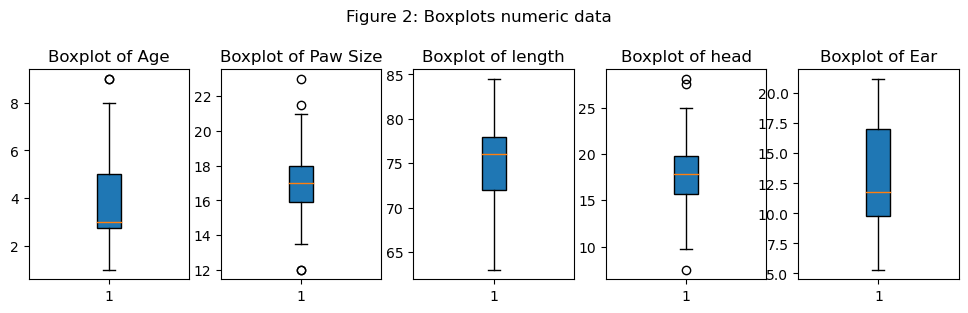

In [32]:

fig = plt.figure(figsize =(12, 6))
# Creating plot
plt.subplot(2, 5, 1)
plt.boxplot(kdf["age_in_years"], patch_artist=True)
plt.title('Boxplot of Age')

plt.subplot(2, 5, 2)
plt.boxplot(kdf['Paw Size'], patch_artist=True)
plt.title('Boxplot of Paw Size')

plt.subplot(2, 5, 3)
plt.boxplot(kdf['total_length'], patch_artist=True)
plt.title('Boxplot of length')

plt.subplot(2, 5, 4)
plt.boxplot(kdf["head_length"], patch_artist=True)
plt.title('Boxplot of head')

plt.subplot(2, 5, 5)
plt.boxplot(kdf['ear_size'], patch_artist=True)
plt.title('Boxplot of Ear')


plt.suptitle('Figure 2: Boxplots numeric data', fontsize=12)

Text(0.5, 0.98, 'Figure 3: Boxplots numeric data')

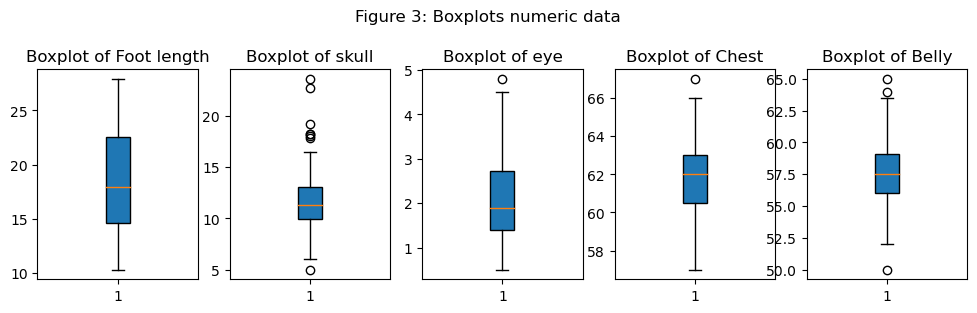

In [33]:

fig = plt.figure(figsize =(12, 6))
# Creating plot

plt.subplot(2, 5, 1)
plt.boxplot(kdf['foot_length'], patch_artist=True)
plt.title('Boxplot of Foot length')

plt.subplot(2, 5, 2)
plt.boxplot(kdf["skull_width"], patch_artist=True)
plt.title('Boxplot of skull')

plt.subplot(2, 5, 3)
plt.boxplot(kdf['eye_diameter'], patch_artist=True)
plt.title('Boxplot of eye')

plt.subplot(2, 5, 4)
plt.boxplot(kdf['chest_circumference'], patch_artist=True)
plt.title('Boxplot of Chest')

plt.subplot(2, 5, 5)
plt.boxplot(kdf['belly_circumference'], patch_artist=True)
plt.title('Boxplot of Belly')

plt.suptitle('Figure 3: Boxplots numeric data', fontsize=12)

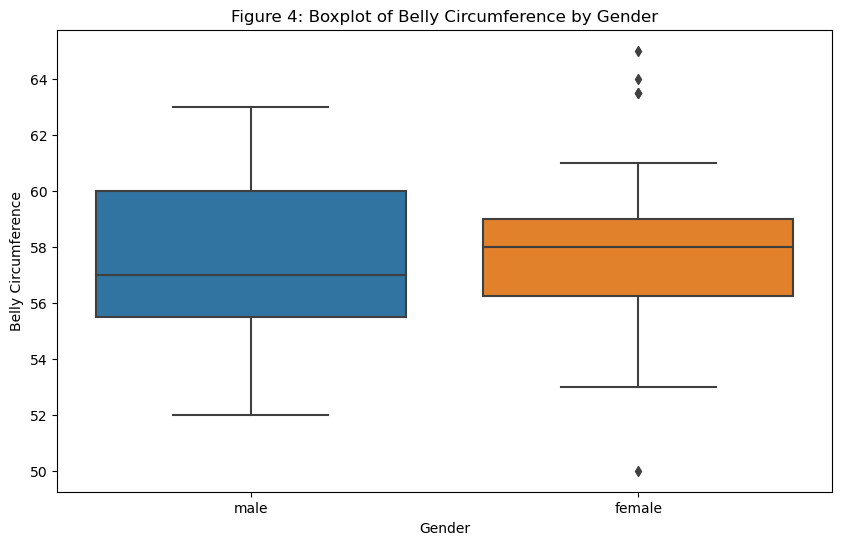

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='belly_circumference', data=kdf)

plt.title('Figure 4: Boxplot of Belly Circumference by Gender')
plt.xlabel('Gender')
plt.ylabel('Belly Circumference')
plt.show()

We notice from the boxplot in Figure 1 that skull, eye, chest, belly, age, paw size and headcould potentially have some outliers. Let´s analize them and look for values that fall 1.5 times below or above our interquartile range for each feature.

In [35]:
def calculate_outliers_limits(df, column_name):

    feature_df = df[column_name]
    
    # Calculate 25th and 75th percentiles
    percentile25 = feature_df.quantile(0.25)
    percentile75 = feature_df.quantile(0.75)
    
    # Calculate IQR and outlier limits
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    median_value = feature_df.median()
    df.loc[df[column_name] > upper_limit, column_name] = median_value
    df.loc[df[column_name] < lower_limit, column_name] = median_value
    print(f"Replaced outliers in {column_name}:")
    print(f"Lower limit: {lower_limit}, Upper limit: {upper_limit}")
    print(f"Median: {median_value}")
    print("\n")

    # Print out the results
    print(f"The Lower limit for {column_name} is: {lower_limit}")
    print(f"The Upper limit for {column_name} is: {upper_limit}")
    print(f"Max value in {column_name}: {feature_df.max()}")
    print(f"Min value in {column_name}: {feature_df.min()}")
    print("\n")

# List of columns to calculate IQR limits for
columns = ["Paw Size", "head_length",
           "chest_circumference", "skull_width", "eye_diameter"]

# Apply the function to each column in the DataFrame
for column in columns:
    calculate_outliers_limits(kdf, column)


Replaced outliers in Paw Size:
Lower limit: 12.6875, Upper limit: 21.1875
Median: 17.0


The Lower limit for Paw Size is: 12.6875
The Upper limit for Paw Size is: 21.1875
Max value in Paw Size: 21.0
Min value in Paw Size: 13.5


Replaced outliers in head_length:
Lower limit: 9.599999999999994, Upper limit: 25.800000000000004
Median: 17.8


The Lower limit for head_length is: 9.599999999999994
The Upper limit for head_length is: 25.800000000000004
Max value in head_length: 24.9
Min value in head_length: 9.7


Replaced outliers in chest_circumference:
Lower limit: 56.75, Upper limit: 66.75
Median: 62.0


The Lower limit for chest_circumference is: 56.75
The Upper limit for chest_circumference is: 66.75
Max value in chest_circumference: 66.0
Min value in chest_circumference: 57.0


Replaced outliers in skull_width:
Lower limit: 5.2875, Upper limit: 17.7875
Median: 11.3


The Lower limit for skull_width is: 5.2875
The Upper limit for skull_width is: 17.7875
Max value in skull_width: 16.5
M

We didn´t replace the age as it could be an older koala,nor the belly circumference and it could be pregnant koalas that could give us good information, the rest of the outliers were replaced with the median value

## 1.6 Find skewness and correct it if any

Lets check the skewness for all the numerical values


Text(0.5, 0, 'ear size')

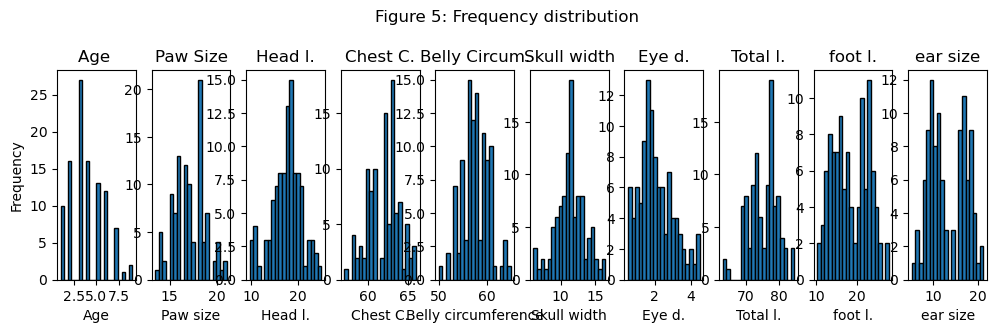

In [36]:
fig = plt.figure(figsize =(12, 6)) 
plt.suptitle('Figure 5: Frequency distribution', fontsize=12)

plt.subplot(2, 10, 1)
plt.hist(kdf["age_in_years"], bins=20, edgecolor='black')
plt.title("Age ")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(2, 10, 2)
plt.hist(kdf["Paw Size"], bins=20, edgecolor='black')
plt.title("Paw Size")
plt.xlabel("Paw size")


plt.subplot(2, 10, 3)
plt.hist(kdf["head_length"], bins=20, edgecolor='black')
plt.title("Head l.")
plt.xlabel("Head l.")


plt.subplot(2,10, 4)
plt.hist(kdf["chest_circumference"], bins=20, edgecolor='black')
plt.title("Chest C.")
plt.xlabel("Chest C.")


plt.subplot(2,10, 5)
plt.hist(kdf["belly_circumference"], bins=20, edgecolor='black')
plt.title("Belly Circum.")
plt.xlabel("Belly circumference")


plt.subplot(2,10, 6)
plt.hist(kdf["skull_width"], bins=20, edgecolor='black')
plt.title("Skull width")
plt.xlabel("Skull width")


plt.subplot(2,10, 7)
plt.hist(kdf["eye_diameter"], bins=20, edgecolor='black')
plt.title("Eye d.")
plt.xlabel("Eye d.")

plt.subplot(2,10, 8)
plt.hist(kdf["total_length"], bins=20, edgecolor='black')
plt.title("Total l.")
plt.xlabel("Total l.")

plt.subplot(2,10, 9)
plt.hist(kdf["foot_length"], bins=20, edgecolor='black')
plt.title("foot l.")
plt.xlabel("foot l.")

plt.subplot(2,10,10)
plt.hist(kdf["ear_size"], bins=20, edgecolor='black')
plt.title("ear size")
plt.xlabel("ear size")

We don´t have any skewness

# Section 2: Data visualisation 
    2.1 Boxplot of total length by habitat for males and females koalas
    2.2 Correlation between variables


## 2.1 Total length by habitat

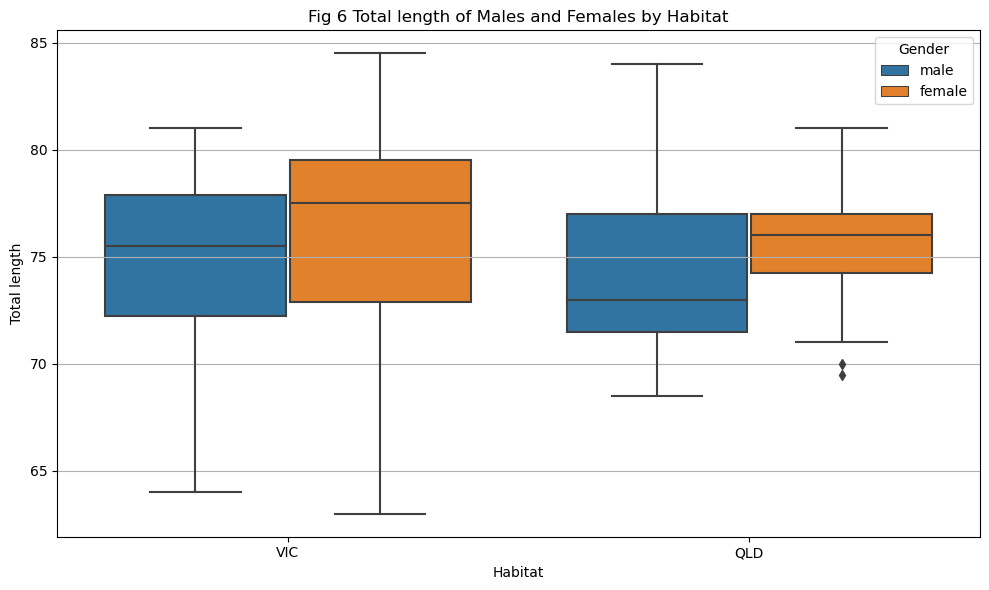

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x="habitat", y="total_length", hue="gender", data=kdf)

plt.title("Fig 6 Total length of Males and Females by Habitat")
plt.xlabel("Habitat")
plt.ylabel("Total length")
plt.legend(title="Gender")
plt.grid(axis="y")

plt.tight_layout()
plt.show()


Habitat Comparison: In Fig 6 we can see as for both genders, Koalas in VIC show a wider distribution of total lengths, with some outliers present. This could imply that there is a greater variety of total lengths in this region compared to QLD. In QLD, the box for female Koalas is shorter than that for males, indicating less variability in their total length compared to the males in the same habitat.
While both males and females have longer total lengths in VIC compared to QLD, the lengths seem to cluster more tightly in QLD. This suggests that the environmental conditions in VIC may support a broader range of sizes for Koalas.
Overall, this box plot provides valuable insights into the physical characteristics of male and female Koalas based on their habitat. In this case, the significant differences in total length and variability suggest that gender and habitat play crucial roles in the physical development of Koalas. Further analysis could investigate the underlying factors contributing to these differences, such as food availability, environmental conditions, or genetic factors.


## 2.2 Belly circumference males and females by habitat

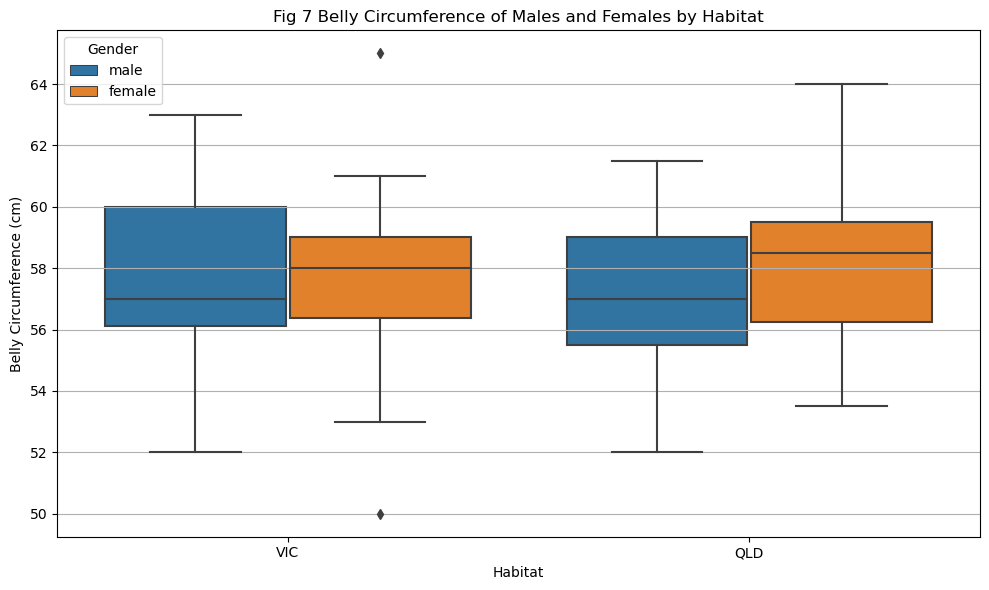

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.boxplot(x="habitat", y="belly_circumference", hue="gender", data=kdf)

plt.title("Fig 7 Belly Circumference of Males and Females by Habitat")
plt.xlabel("Habitat")
plt.ylabel("Belly Circumference (cm)")
plt.legend(title="Gender")
plt.grid(axis="y")

plt.tight_layout()
plt.show()


I decided to do this visualization (fig 7) to further investigate the belly circumference of koalas after finding some “outliers” during the EDA.
Central Tendencies: The median belly circumference for males appears to be higher than for females in all the habitats VIC and QLD. Males generally have a wider interquartile range (IQR) compared to females, indicating more variability in belly circumference among males.
Variability: The spread (IQR) for males is greater than for females in VIC, which suggests that male belly circumference measurements are more dispersed. In QLD, the distributions for males and females seem to have similar spreads.
Habitat Differences: The overall belly circumference seems to be higher in the VIC habitat compared to QLD for both genders, indicating possible environmental or biological factors influencing these measurements. The boxplots indicate notable differences in belly circumference based on gender and habitat, suggesting a possible link between these factors. Further analysis may be needed to explore potential biological, environmental, or lifestyle factors contributing to these differences.


# Section 3: Analysis 
    3.1 Is the mean head length of the Koalas significantly different from 92.0 mm?
    3.2 Do male and female Koalas have significantly different mean head lengths?
    3.3 Can we predict the total length of a Koala based on its head length?
    3.4 Can we predict the total length of a Koala based on multiple factors such as head length, skull width, and foot length?
    3.5 Do environmental factors such as state affect Koala’s physical characteristics?
    3.6 What factors are correlated with the total length of a Koala?


## 3.1 Is the mean head length of the Koalas significantly different from 92.0 mm?

We are going to conduct hypothesis testing to understand if the head length of koala is significantly different from 92.00mm

1. We state the hypothesis
Ho:  μ = 92.00 mm
Ha:  μ ≠ 92.00 mm

2. Our significance level α is 0.05

3. This is a two-tailed one sample test because we are testing for any difference (either greater than or less than 92.0 mm).

4. This is a one sample test because we don´t know the population details (standard deviation)


In [39]:
from scipy import stats

head_lengths = kdf["head_length"] # Remove null values

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(head_lengths, 92.0)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: -242.62923533120633, P-value: 7.374213407375175e-144


T-statistic: The large negative value of the t-statistic suggests that the sample mean of the koalas' head length is much smaller than the hypothesized value of 92.0 mm. The more extreme the t-statistic (either positive or negative), the more evidence there is against the null hypothesis.

P-value: A p-value of 7.37e-144 is extremely small (practically zero), which is far below any common significance level (e.g., α = 0.05 or 0.01). This means there is overwhelming evidence to reject the null hypothesis.

The null hypothesis Ho:  μ = 92.00 mm is rejected. 

Conclusion:
I can confidently reject the null hypothesis that the mean head length of koalas is 92.0 mm. There is a statistically significant difference, and the data suggests that the mean head length is likely much lower than 92.0 mm.

In [40]:
mean_head_length = head_lengths.mean()
print(f"Sample mean of head length: {mean_head_length}")

Sample mean of head length: 17.505288461538463


## 3.2 Do male and female Koalas have significantly different mean head lengths?

We are going to conduct hypothesis testing to understand if the head length of koalas males and females is significantly different

1. We state the hypothesis
Ho:  μmale = μfemale 
Ha:  μmale ≠ μfemale 

2. Our signficance level α is 0.05

3. This is a two-sample t-test, because I am comparing two independent groups (males and females). 


In [41]:
male_koalas = kdf[kdf["gender"] == "male"]["head_length"]
female_koalas = kdf[kdf["gender"] == "female"]["head_length"]

In [42]:
#perform a 2 sample t-test
t_statistic, p_value = stats.ttest_ind(male_koalas, female_koalas)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: 0.9744980153906871, P-value: 0.3321147689111218


T-statistic: 0.97: This value indicates how far the difference between the sample means is from 0, in terms of standard errors. A t-statistic close to 0 suggests that the difference between the sample means of male and female koalas is small.

P-value: 0.33: Since this p-value is greater than your significance level (α = 0.05), we fail to reject the null hypothesis.

Conclusion:
There is no significant difference in the mean head lengths between male and female koalas based on the data. The data suggests that the head lengths of male and female koalas are statistically similar.

We do not have enough evidence to say that male and female koalas have different head lengths.

In [43]:
mean_male_koalas = kdf[kdf["gender"] == "male"]["head_length"].mean()
mean_female_koalas = kdf[kdf["gender"] == "female"]["head_length"].mean()
print(f"Sample mean of head length for males: {mean_male_koalas}")
print(f"Sample mean of head length for female: {mean_female_koalas}")

Sample mean of head length for males: 17.75655737704918
Sample mean of head length for female: 17.148837209302325


## 3.3 Can we predict the total length of a Koala based on its head length?

In [44]:
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

X = kdf["head_length"]  #independent variable
Y = kdf["total_length"]  #dependent variable
X = sm.add_constant(X)

#we build/train the model
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           total_length   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     74.90
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           7.62e-14
Time:                        17:53:29   Log-Likelihood:                -270.39
No. Observations:                 104   AIC:                             544.8
Df Residuals:                     102   BIC:                             550.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          59.4072      1.840     32.280      

Based on the results of our OLS regression analysis, we can conclude that head length is a significant predictor of total length. Here are the key points supporting this conclusion:

**Statistical Significance:**  
The p-value for the `head_length` coefficient is 0.000, which is well below the commonly accepted significance threshold of 0.05. This indicates that there is a statistically significant relationship between head length and total length. We can reject the null hypothesis that there is no relationship between these two variables.

**Predictive Relationship:**  
The coefficient for `head_length` is 0.895, suggesting that for every additional unit increase in head length, the total length is expected to increase by approximately 0.8958 units, holding all else constant. This positive relationship supports the idea that as head length increases, total length also increases.

**Constant (Intercept):**  
The constant value is 59.40, which implies that when head length is zero, the total length is expected to be around 59.40 units. However, this value may not be practically meaningful due to the biological nature of the data (as head length is unlikely to be zero).

**Model Fit:**  
The R-squared value is 0.423, indicating that approximately 42.3% of the variability in total length can be explained by head length. While this shows that the model has some explanatory power, it also suggests that there are other factors influencing total length that are not included in the model.

**Conclusion:**  
In summary, the analysis shows that head length is a statistically significant predictor of total length, with a positive relationship between the two variables. While head length provides some predictive power, the model could benefit from additional variables to improve its explanatory capability.

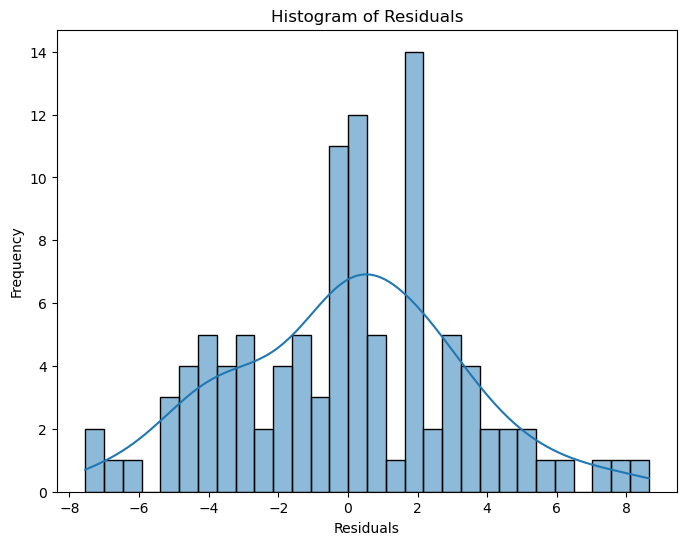

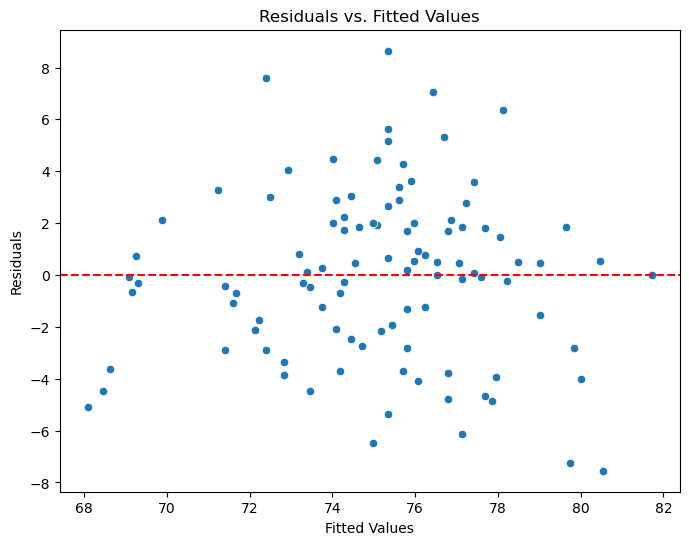

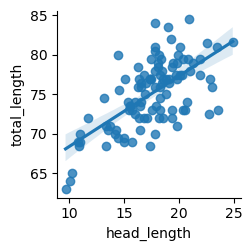

In [45]:
# Get the residuals
residuals = model.resid

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Get fitted values
fitted_vals = model.fittedvalues

# Scatter plot of residuals vs. fitted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Pairplot to visualize lnear relationship
sns.pairplot(kdf, x_vars=kdf[["head_length"]], y_vars='total_length', kind='reg', height=2.5)
plt.show()

## 3.4 Can we predict the total length of a Koala based on multiple factors such as head length, skull width, and foot length?

In [46]:
X = kdf[["head_length", "skull_width", "foot_length"]]  
y = kdf["total_length"]  
X = sm.add_constant(X)

#we build/train the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           total_length   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     34.79
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.75e-15
Time:                        17:53:29   Log-Likelihood:                -261.85
No. Observations:                 104   AIC:                             531.7
Df Residuals:                     100   BIC:                             542.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.5528      1.941     28.626      

In [47]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = kdf[["head_length", "skull_width", "foot_length"]] 
y = kdf['total_length']
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns

vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


print(vif_data)


       Feature        VIF
0        const  41.822457
1  head_length   1.997762
2  skull_width   1.904364
3  foot_length   1.159728


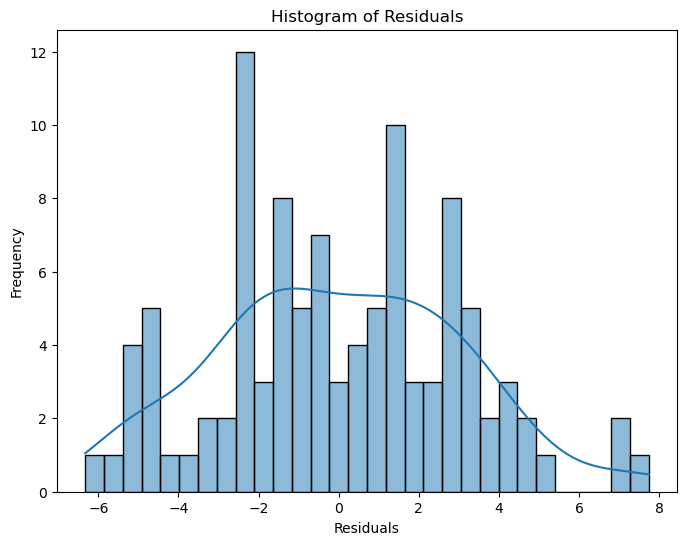

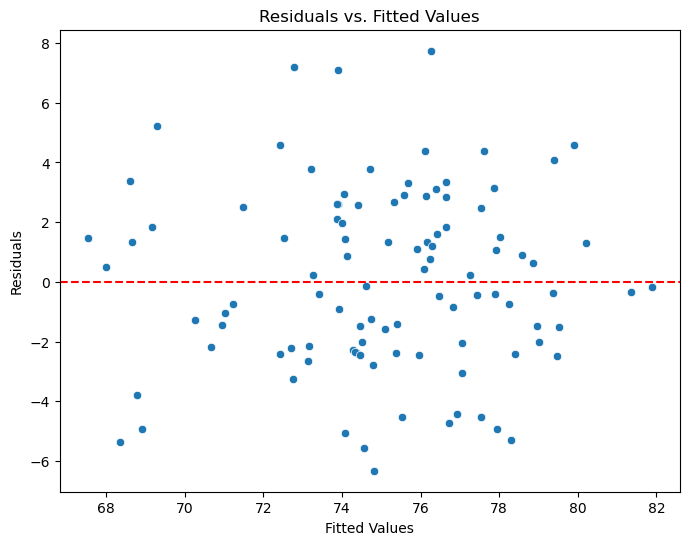

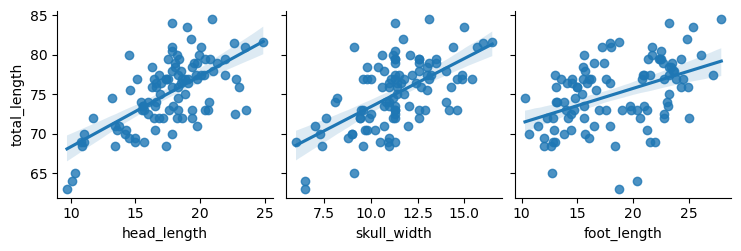

In [48]:
# Get the residuals
residuals = model.resid

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Get fitted values
fitted_vals = model.fittedvalues

# Scatter plot of residuals vs. fitted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(kdf, x_vars=kdf[["head_length", "skull_width", "foot_length"]], y_vars='total_length', kind='reg', height=2.5)
plt.show()

Based on the results of our multiple regression analysis, we can conclude that head length, skull width, and foot length are significant predictors of total length. Here are the key points supporting this conclusion:

**Statistical Significance:**  
- **Head Length:** The p-value for the `head_length` coefficient is 0.000, indicating that it is highly statistically significant. We can confidently reject the null hypothesis that there is no relationship between head length and total length.
- **Skull Width:** The p-value for `skull_width` is 0.006, also below the significance threshold of 0.05, indicating a statistically significant relationship between skull width and total length.
- **Foot Length:** The p-value for `foot_length` is 0.004, demonstrating a significant relationship between foot length and total length.

**Predictive Relationship:**  
- The coefficient for `head_length` is 0.5293, meaning that for every additional unit of head length, total length is expected to increase by approximately 0.5293 units, holding other variables constant.
- The coefficient for `skull_width` is 0.5481, indicating that for every additional unit of skull width, total length is expected to increase by 0.5481 units, holding other variables constant.
- The coefficient for `foot_length` is 0.2193, meaning that for every unit increase in foot length, total length is expected to increase by approximately 0.2193 units, holding other variables constant.

**Model Fit:**  
The R-squared value of 0.511 indicates that approximately 51.1% of the variability in total length is explained by the combined predictors of head length, skull width, and foot length. This is a better fit than the model using only head length, which explains 42.3% of the variability. The adjusted R-squared of 0.496 accounts for the number of predictors and suggests a good model fit with room for improvement by considering additional factors.

**Conclusion:**  
In summary, our analysis demonstrates that head length, skull width, and foot length are significant predictors of total length. The positive relationships between these variables and total length support their inclusion in predictive models. While the model explains a significant portion of the variability in total length, further improvements could be made by considering other factors.

## 3.5 Do environmental factors such as state affect Koala’s physical characteristics?


First I need to use one hot encoding for the categorical values Habitat and Gender

In [49]:
from sklearn.preprocessing import OneHotEncoder
# One-hot encoding for categorical features (habitat and gender)
kdf = pd.get_dummies(kdf, columns=['habitat', 'gender'], drop_first=True)
kdf = kdf.replace({True: 1, False: 0})
kdf.head() 

,koala_id,region,age_in_years,Paw Size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference,habitat_VIC,gender_male
0,1,1,8.0,16.0,77.0,19.1,19.5,24.5,15.4,2.2,63.0,61.0,1,1
1,2,1,6.0,16.5,79.5,17.5,16.2,22.5,12.6,3.0,63.5,58.0,1,0
2,3,1,6.0,19.0,83.5,19.0,16.9,25.4,15.0,2.5,65.0,59.0,1,0
3,4,1,6.0,18.0,80.0,18.2,17.2,26.1,12.1,2.2,63.0,59.0,1,0
4,5,1,2.0,16.0,73.5,16.5,18.2,21.0,11.3,2.1,63.5,58.0,1,0


I am going to find if there is a significant relationship between the states and the physical characteristics of the koalas using OLS for each specific feature vs the states

In [50]:
#First Paw Size
X = kdf["habitat_VIC"]  #independent variable
Y = kdf["Paw Size"]  #dependent variable
X = sm.add_constant(X)

#we build/train the model
model = sm.OLS(Y, X).fit()
print("Summary of relationship between state and Paw Size")
print(model.summary())

Summary of relationship between state and Paw Size
                            OLS Regression Results                            
Dep. Variable:               Paw Size   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     26.68
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.20e-06
Time:                        17:53:30   Log-Likelihood:                -188.68
No. Observations:                 104   AIC:                             381.4
Df Residuals:                     102   BIC:                             386.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [51]:
#total length
X = kdf["habitat_VIC"]  #independent variable
Y = kdf["total_length"]  #dependent variable
X = sm.add_constant(X)

#we build/train the model
model = sm.OLS(Y, X).fit()
print("Summary of relationship between state and total length")
print(model.summary())

Summary of relationship between state and total length
                            OLS Regression Results                            
Dep. Variable:           total_length   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6351
Date:                Mon, 14 Oct 2024   Prob (F-statistic):              0.427
Time:                        17:53:30   Log-Likelihood:                -298.70
No. Observations:                 104   AIC:                             601.4
Df Residuals:                     102   BIC:                             606.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [52]:
#head length
X = kdf["habitat_VIC"]  #independent variable
Y = kdf["head_length"]  #dependent variable
X = sm.add_constant(X)

#we build/train the model
model = sm.OLS(Y, X).fit()
print("Summary of relationship between state and head length")
print(model.summary())

Summary of relationship between state and head length
                            OLS Regression Results                            
Dep. Variable:            head_length   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.07140
Date:                Mon, 14 Oct 2024   Prob (F-statistic):              0.790
Time:                        17:53:30   Log-Likelihood:                -265.74
No. Observations:                 104   AIC:                             535.5
Df Residuals:                     102   BIC:                             540.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [53]:
#ear size
X = kdf["habitat_VIC"]  #independent variable
Y = kdf["ear_size"]  #dependent variable
X = sm.add_constant(X)

#we build/train the model
model = sm.OLS(Y, X).fit()
print("Summary of relationship between state and ear size")
print(model.summary())

Summary of relationship between state and ear size
                            OLS Regression Results                            
Dep. Variable:               ear_size   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     363.6
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           2.09e-35
Time:                        17:53:30   Log-Likelihood:                -215.14
No. Observations:                 104   AIC:                             434.3
Df Residuals:                     102   BIC:                             439.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [54]:
#Foot length
X = kdf["habitat_VIC"]  #independent variable
Y = kdf["foot_length"]  #dependent variable
X = sm.add_constant(X)

#we build/train the model
model = sm.OLS(Y, X).fit()
print("Summary of relationship between state and foot length")
print(model.summary())

Summary of relationship between state and foot length
                            OLS Regression Results                            
Dep. Variable:            foot_length   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     166.4
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           3.67e-23
Time:                        17:53:30   Log-Likelihood:                -250.23
No. Observations:                 104   AIC:                             504.5
Df Residuals:                     102   BIC:                             509.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [55]:
#skull width
X = kdf[ "habitat_VIC"]  #independent variable
Y = kdf["skull_width"]  #dependent variable
X = sm.add_constant(X)

#we build/train the model
model = sm.OLS(Y, X).fit()
print("Summary of relationship between state and skull width")
print(model.summary())

Summary of relationship between state and skull width
                            OLS Regression Results                            
Dep. Variable:            skull_width   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.02826
Date:                Mon, 14 Oct 2024   Prob (F-statistic):              0.867
Time:                        17:53:30   Log-Likelihood:                -225.13
No. Observations:                 104   AIC:                             454.3
Df Residuals:                     102   BIC:                             459.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [56]:
#eye diameter
X = kdf[ "habitat_VIC"]  #independent variable
Y = kdf["eye_diameter"]  #dependent variable
X = sm.add_constant(X)

#we build/train the model
model = sm.OLS(Y, X).fit()
print("Summary of relationship between state and eye diameter")
print(model.summary())

Summary of relationship between state and eye diameter
                            OLS Regression Results                            
Dep. Variable:           eye_diameter   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.195
Date:                Mon, 14 Oct 2024   Prob (F-statistic):              0.142
Time:                        17:53:31   Log-Likelihood:                -141.45
No. Observations:                 104   AIC:                             286.9
Df Residuals:                     102   BIC:                             292.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [57]:
#chest circumference
X = kdf["habitat_VIC"]  #independent variable
Y = kdf["chest_circumference"]  #dependent variable
X = sm.add_constant(X)

#we build/train the model
model = sm.OLS(Y, X).fit()
print("Summary of relationship between state and chest circumference")
print(model.summary())

Summary of relationship between state and chest circumference
                             OLS Regression Results                            
Dep. Variable:     chest_circumference   R-squared:                       0.050
Model:                             OLS   Adj. R-squared:                  0.040
Method:                  Least Squares   F-statistic:                     5.318
Date:                 Mon, 14 Oct 2024   Prob (F-statistic):             0.0231
Time:                         17:53:31   Log-Likelihood:                -215.72
No. Observations:                  104   AIC:                             435.4
Df Residuals:                      102   BIC:                             440.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [58]:
#belly circumference
X = kdf[ "habitat_VIC"]  #independent variable
Y = kdf["belly_circumference"]  #dependent variable
X = sm.add_constant(X)

#we build/train the model
model = sm.OLS(Y, X).fit()
print("Summary of relationship between state and belly circumference")
print(model.summary())

Summary of relationship between state and belly circumference
                             OLS Regression Results                            
Dep. Variable:     belly_circumference   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.009
Method:                  Least Squares   F-statistic:                   0.06948
Date:                 Mon, 14 Oct 2024   Prob (F-statistic):              0.793
Time:                         17:53:31   Log-Likelihood:                -252.68
No. Observations:                  104   AIC:                             509.4
Df Residuals:                      102   BIC:                             514.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

## 3.6 What factors are correlated with the total length of a Koala?

We are going to follow the multiple regression framework explained in classes. The steps were repeated and not necessarily followed in this strict order

***1.Multiple Regression Approach:*** Used to assesses the relationship between a continuous dependent variable (in this case, the total length of a Koala) and several independent variables (factors). 

***2.Assumptions for Multiple Regression:***
    
    •Linearity: Each predictor variable (like foot length or paw size) should have a linear relationship with Koala length. A scatter plot was used to check this
    •Normality: The residuals (errors) should follow a normal distribution.
    •Independence of observations: Each data point (Koala measurement) should be independent.
    •Homoscedasticity: The variance of errors should be consistent across the model
    
***3.Handling Multicollinearity:*** Used The Variance Inflation Factor (VIF) to check for multicollinearity, and if needed, variables can be transformed or removed.

***4.Run multiple regression again with the selected features***


I will plot the correlation matrix to visualize possible correlations

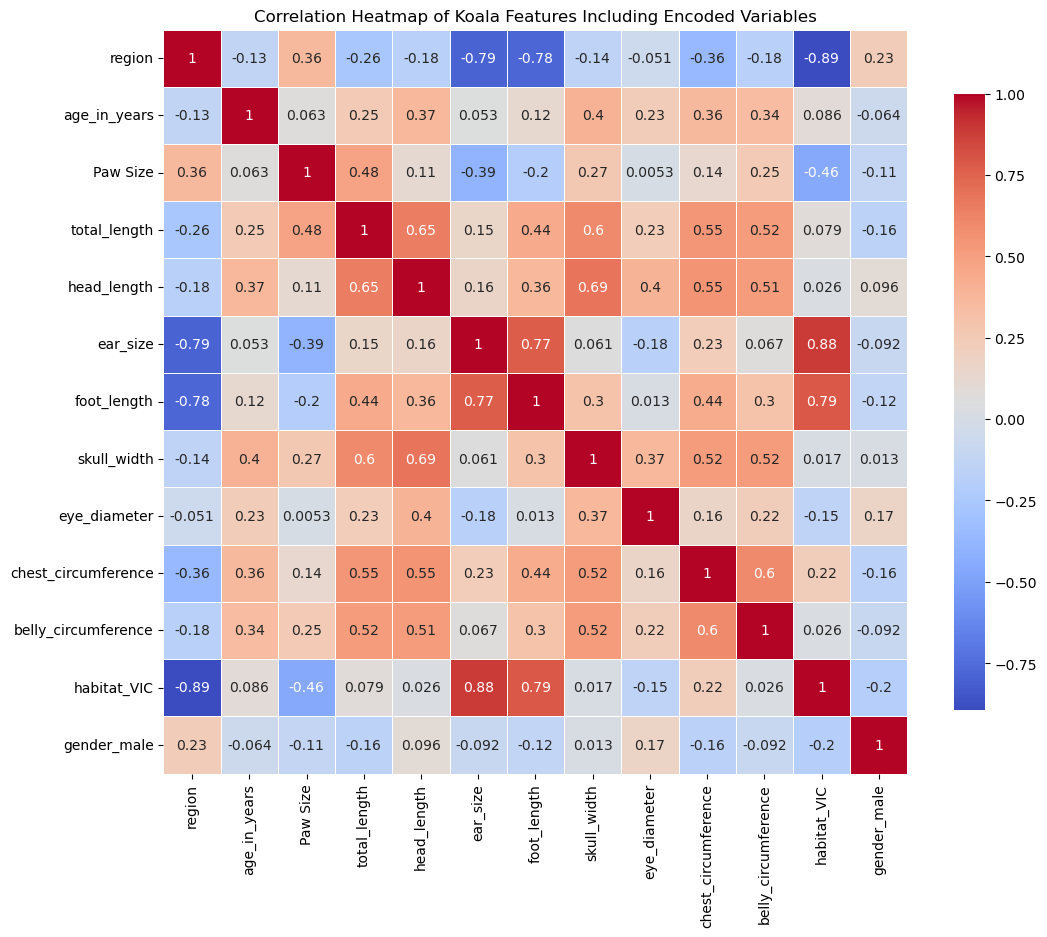

In [59]:
kdf_filtered = kdf.drop(columns=["koala_id"])
corr_matrix = kdf_filtered.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, 
            linewidths=0.5, cbar_kws={"shrink": .8})

plt.title("Correlation Heatmap of Koala Features Including Encoded Variables")

plt.show()


In [60]:
correlation_total_length = corr_matrix["total_length"].sort_values(ascending =False)
correlation_total_length

total_length           1.000000
head_length            0.650697
skull_width            0.600447
chest_circumference    0.545029
belly_circumference    0.518872
Paw Size               0.481378
foot_length            0.443706
age_in_years           0.250970
eye_diameter           0.225365
ear_size               0.153651
habitat_VIC            0.078666
gender_male           -0.160200
region                -0.260843
Name: total_length, dtype: float64

In [61]:
# Define the features (independent variables) and the target (dependent variable)
X = kdf.drop(columns=['total_length', 'koala_id'])  # Exclude target and koala_id
X = sm.add_constant(X)
y = kdf['total_length']

model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:           total_length   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     22.18
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           5.06e-22
Time:                        17:53:31   Log-Likelihood:                -227.91
No. Observations:                 104   AIC:                             481.8
Df Residuals:                      91   BIC:                             516.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  37.6481    

In [62]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = kdf.drop(['total_length', "koala_id", ], axis=1)
y = kdf['total_length']
X = sm.add_constant(X)


vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns

vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


print(vif_data)


                Feature          VIF
0                 const  1922.910709
1                region     6.991386
2          age_in_years     1.369397
3              Paw Size     1.648020
4           head_length     2.964046
5              ear_size     5.884170
6           foot_length     4.591304
7           skull_width     2.361990
8          eye_diameter     1.613791
9   chest_circumference     2.135261
10  belly_circumference     1.886263
11          habitat_VIC    13.420673
12          gender_male     1.241446


In [63]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Define the independent variables (features) and the dependent variable (target)
X = kdf.drop(['total_length', "koala_id", "region", "habitat_VIC"], axis=1)
y = kdf['total_length']

# Add a constant term to the model (for the intercept)
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns

#X.shape[1] tells us how many features (or columns) we have in our dataset X. If we have, say, 5 features, X.shape[1] would be 5.
#range(X.shape[1]): This creates a sequence of numbers from 0 to the number of features minus one (so in our example, from 0 to 4). Each number corresponds to a different feature.
#variance_inflation_factor(X.values, i): For each feature (represented by i), this function calculates the VIF. 
#The function takes in all the data from X (as a NumPy array using X.values) and the specific feature index i to calculate the VIF.
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF data
print(vif_data)


                Feature          VIF
0                 const  1603.606766
1          age_in_years     1.299365
2              Paw Size     1.461206
3           head_length     2.435845
4              ear_size     3.279593
5           foot_length     3.355640
6           skull_width     2.341861
7          eye_diameter     1.407930
8   chest_circumference     2.055413
9   belly_circumference     1.839028
10          gender_male     1.136482


In [64]:
import statsmodels.api as sm

# Define the independent variables (features) and the dependent variable (target)
X = kdf.drop(['total_length', "koala_id", "region", "habitat_VIC", ], axis=1)
y = kdf['total_length']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           total_length   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     24.99
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           3.10e-22
Time:                        17:53:31   Log-Likelihood:                -231.16
No. Observations:                 104   AIC:                             484.3
Df Residuals:                      93   BIC:                             513.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  28.0663    

In [65]:
import statsmodels.api as sm

# Define the independent variables (features) and the dependent variable (target)
X = kdf.drop(["total_length", "koala_id", "region", "habitat_VIC", "ear_size", "age_in_years","skull_width", "eye_diameter", "chest_circumference", "belly_circumference", "gender_male"], axis=1)
y = kdf["total_length"]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           total_length   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     81.35
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.00e-26
Time:                        17:53:31   Log-Likelihood:                -234.76
No. Observations:                 104   AIC:                             477.5
Df Residuals:                     100   BIC:                             488.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          34.9861      2.842     12.310      

 2) Then we check the regression assumptions

First the normality of the residuals

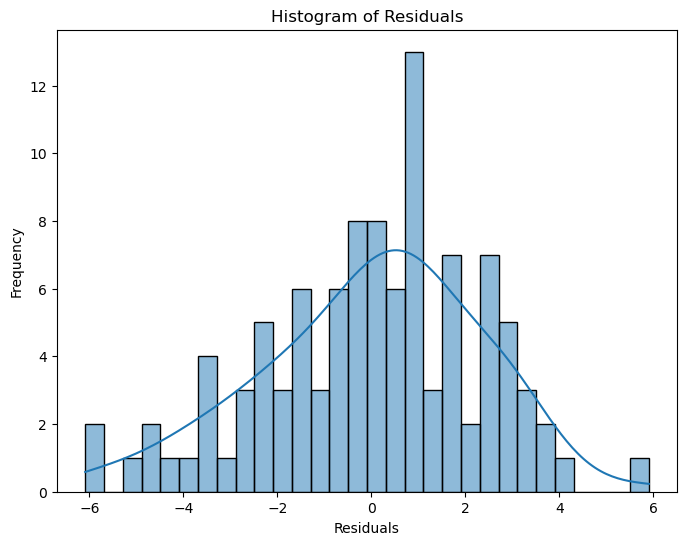

In [66]:
# Get the residuals
residuals = model.resid

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Second we check the homoscedasticity 

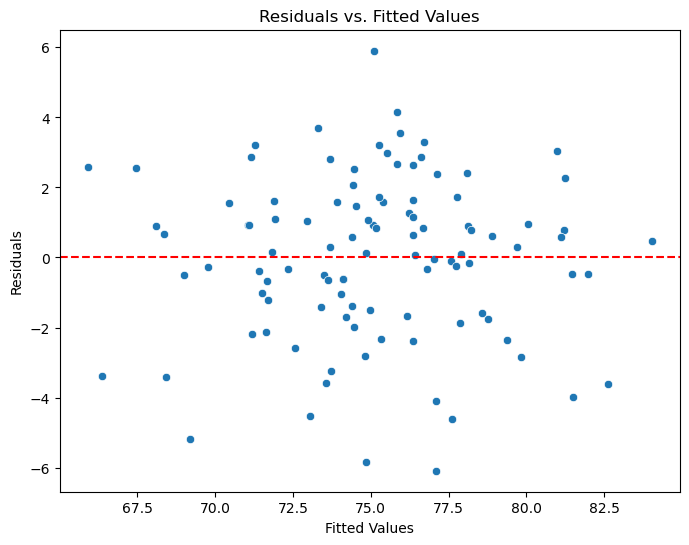

In [67]:
# Get fitted values
fitted_vals = model.fittedvalues

# Scatter plot of residuals vs. fitted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


Third we check the Linearity

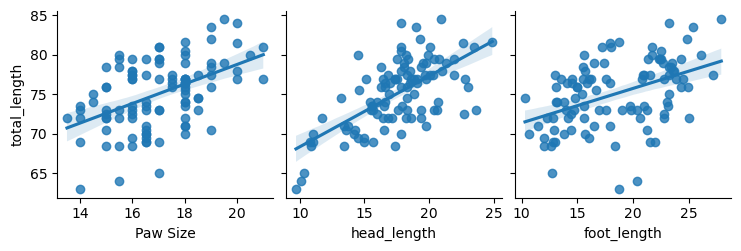

In [68]:
# Pairplot to visualize relationships
sns.pairplot(kdf, x_vars=kdf.columns.drop(["total_length", "koala_id", "region", "habitat_VIC", "ear_size", "age_in_years","skull_width", "eye_diameter", "chest_circumference", "belly_circumference", "gender_male"]), y_vars='total_length', kind='reg', height=2.5)
plt.show()